In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"..\Cases\human-resources-analytics\HR_comma_sep.csv")
dum_hr = pd.get_dummies(df,drop_first=True)
y = dum_hr['left']
X = dum_hr.drop('left', axis=1)

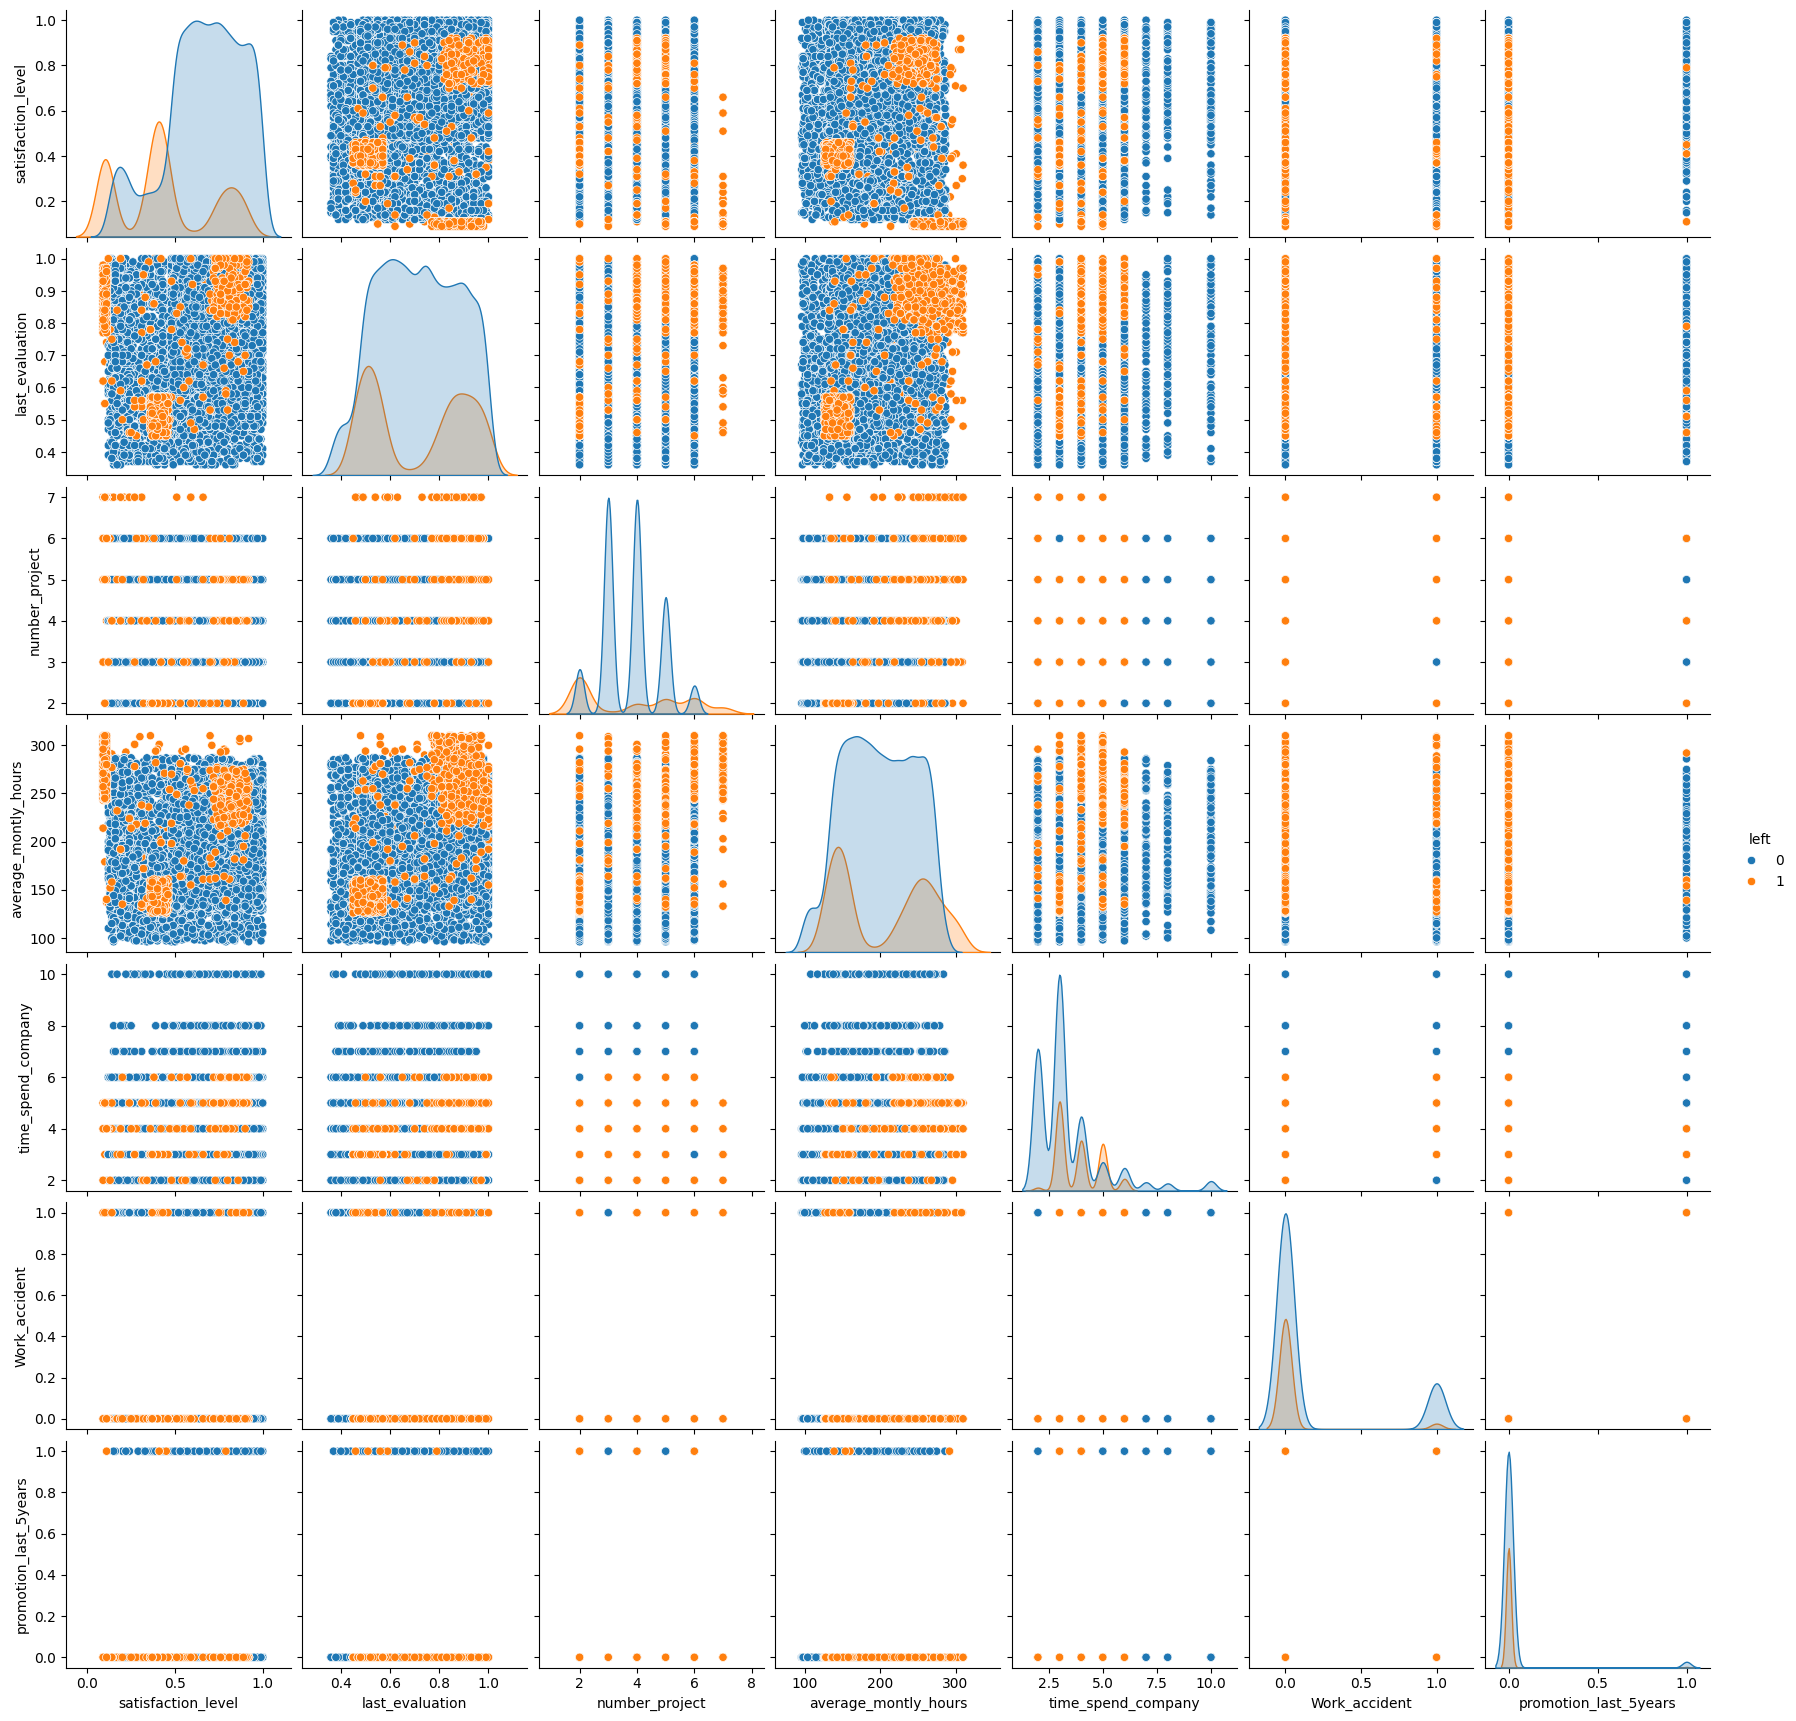

In [5]:
sns.pairplot(data=df, hue='left')
plt.show()

In [6]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline


kfold = StratifiedKFold(shuffle=True, random_state=24, n_splits=5)

dtc = DecisionTreeClassifier(random_state=24)
dtc.fit(X, y)


params = {'max_depth': np.arange(2,11), 
          'min_samples_split': range(2,21),
          'min_samples_leaf': range(2,16)}

gcv = GridSearchCV(dtc, param_grid=params, cv=kfold, scoring='neg_log_loss')

gcv.fit(X, y)

print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 20}
-0.10497032199289043


satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.10             0.77               6   
3                    0.92             0.85               5   
4                    0.89             1.00               5   
...                   ...              ...             ...   
14990                0.40             0.57               2   
14991                0.37             0.48               2   
14992                0.37             0.53               2   
14993                0.11             0.96               6   
14994                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       247                   4              0     1   
3                       259                   5              0     1   
4                       224                   5              0     1   
...                     ...                 ...            ...   ...   
14990                   151                   3              0     1   
14991                   160                   3              0     1   
14992                   143                   3              0     1   
14993                   280                   4              0     1   
14994                   158                   3              0     1   

       promotion_last_5years Department  salary  
0                          0      sales     low  
1                          0      sales  medium  
2                          0      sales     low  
3                          0      sales     low  
4                          0      sales     low  
...                      ...        ...     ...  
14990                      0    support     low  
14991                      0    support     low  
14992                      0    support     low  
14993                      0    support     low  
14994                      0    support     low  

[14995 rows x 10 columns]

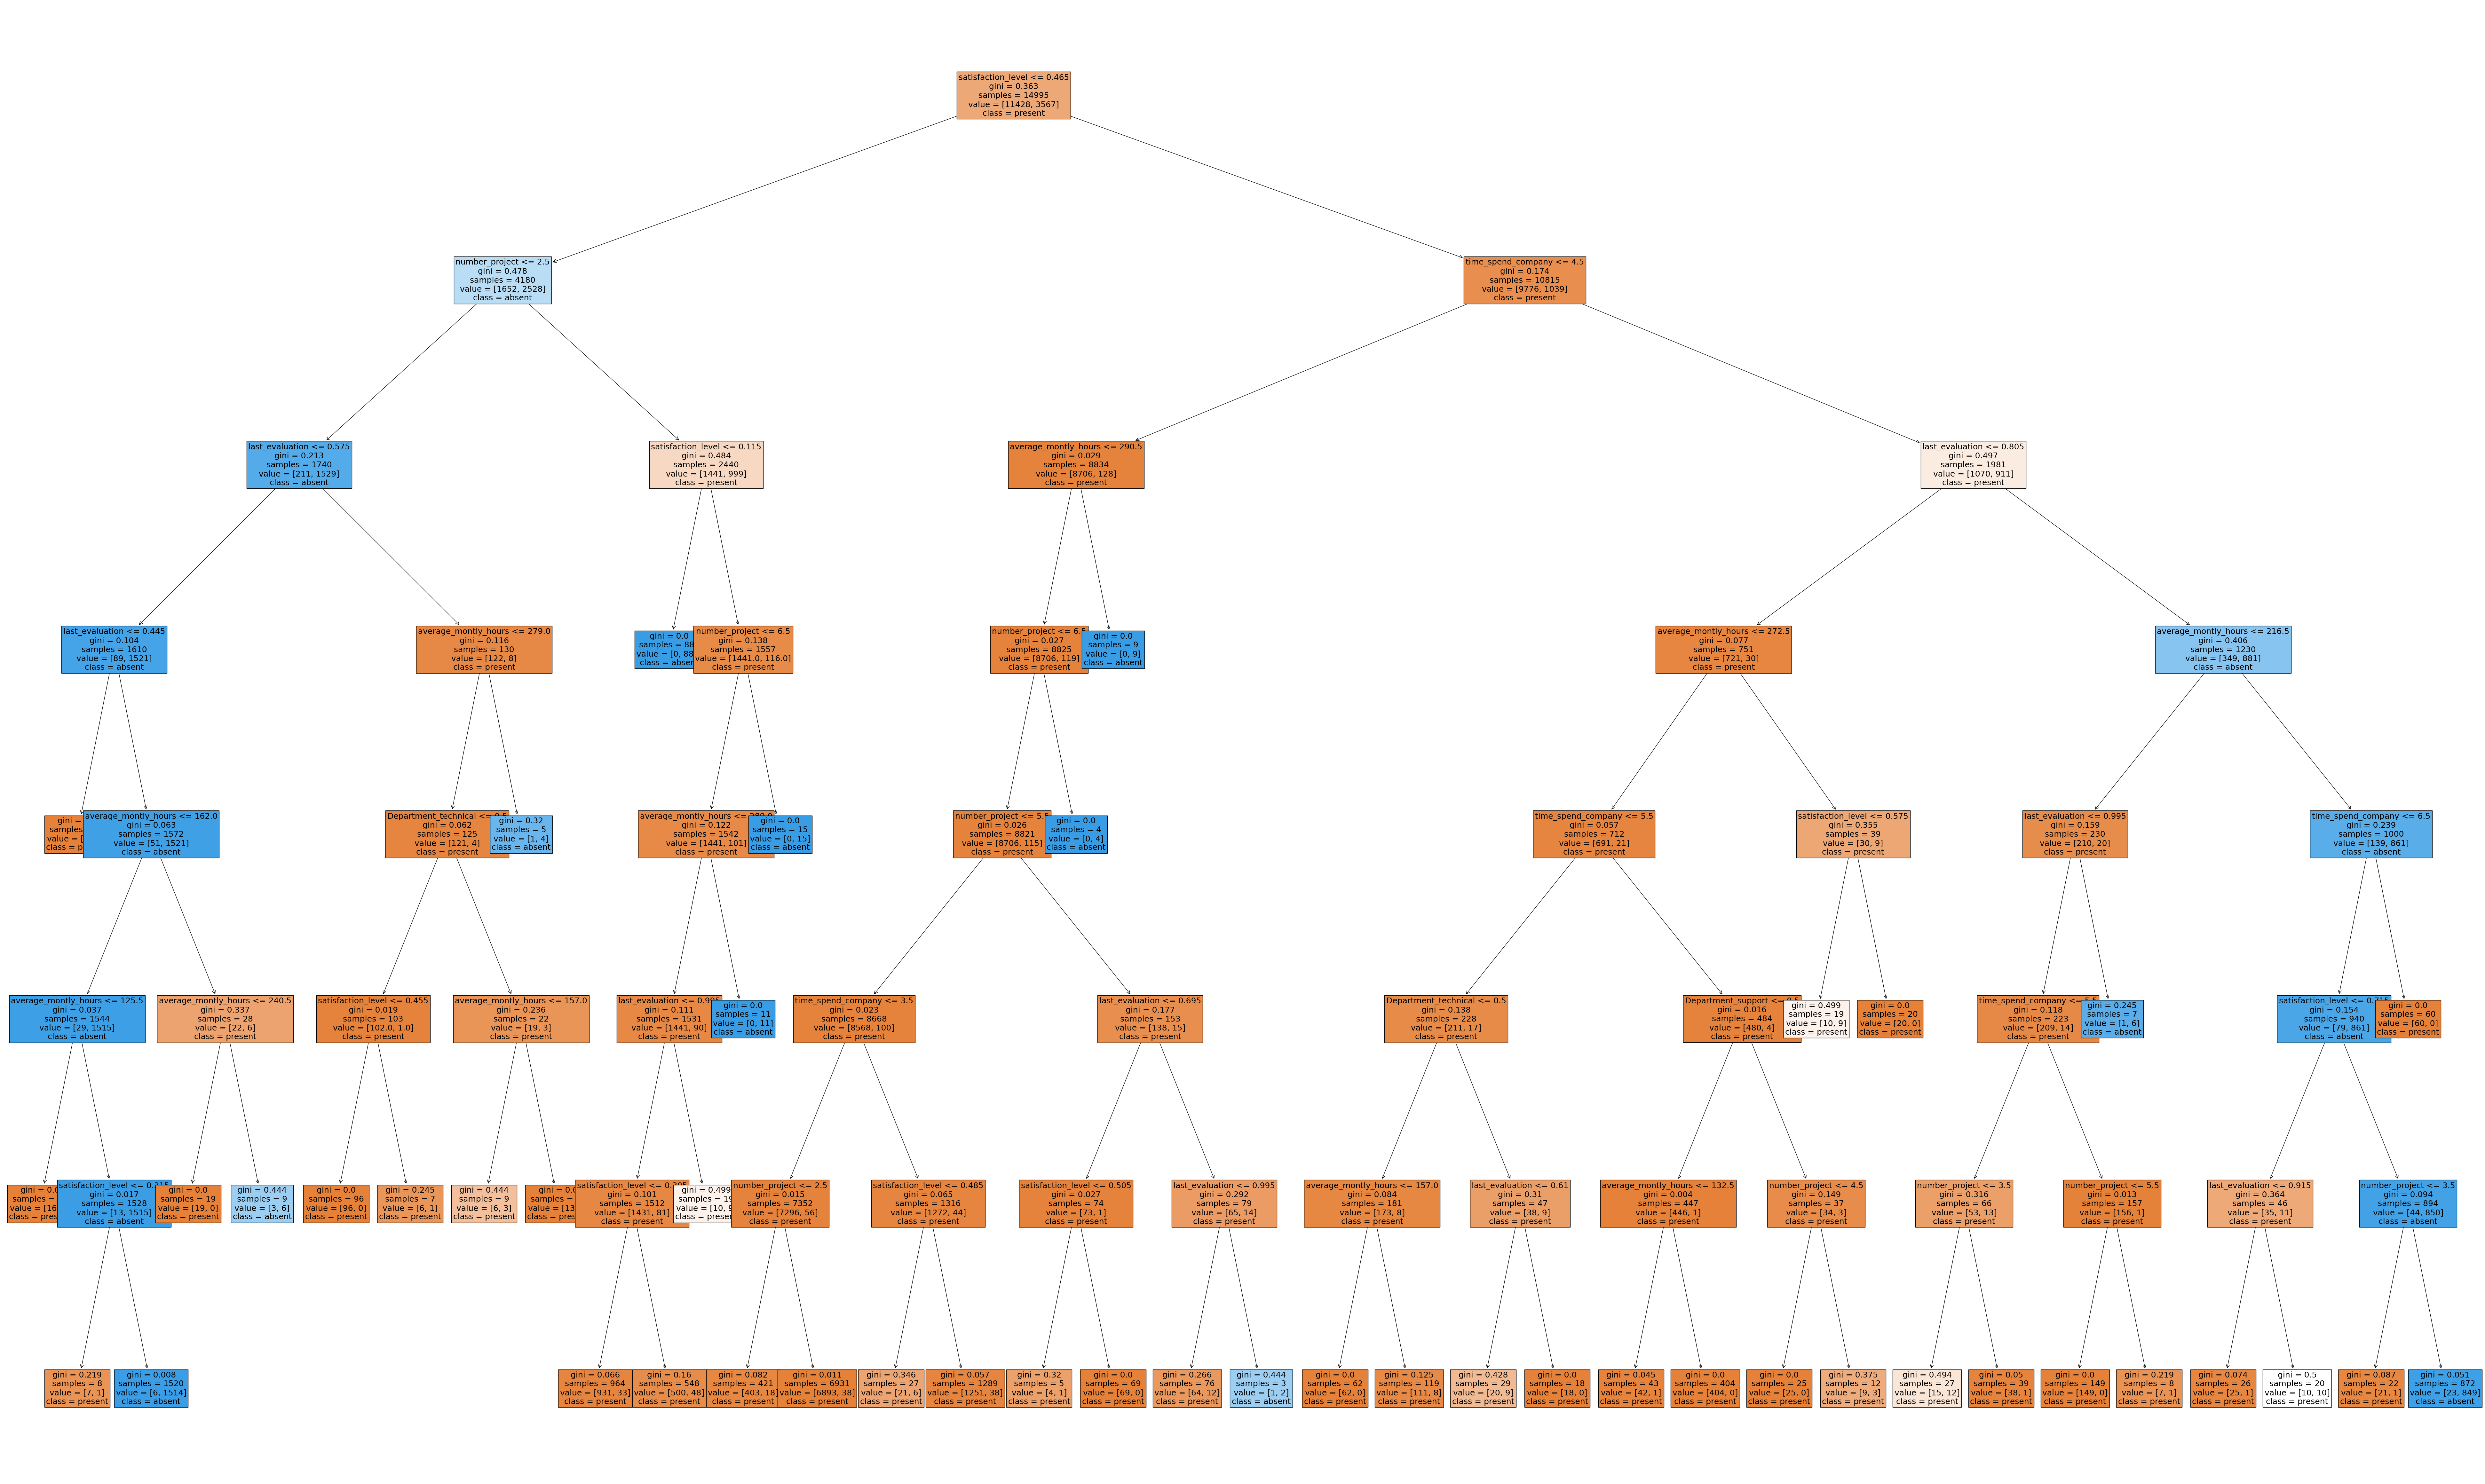

In [15]:
best_tree = gcv.best_estimator_

plt.figure(figsize=(100,60))
plot_tree(best_tree,feature_names=list(X.columns),
               class_names=['present', 'absent'],
               filled=True,fontsize=18
               )
plt.show() 

In [16]:
df_imp = pd.DataFrame({'Features': list(X.columns), 'Fea_Imp':list(best_tree.feature_importances_)})


<Axes: xlabel='Fea_Imp', ylabel='Features'>

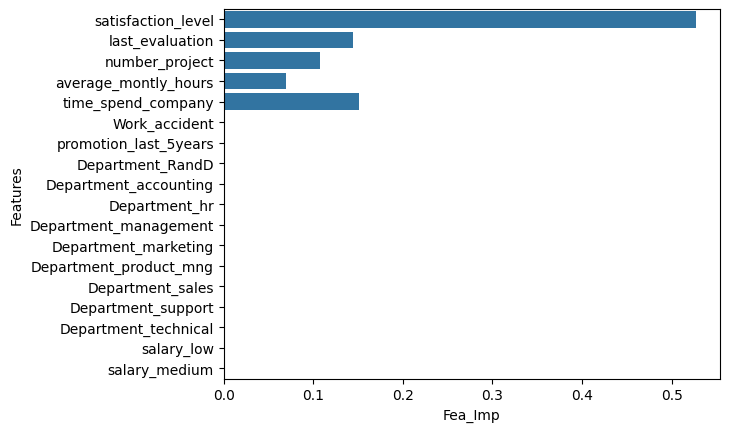

In [24]:
sns.barplot(data=df_imp, y="Features", x="Fea_Imp",orient='h')
